In [148]:
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from collections import defaultdict
from cluster import hard_cluster
import community

<center> <h1> Comparison between the pre-network and the post-network </h1></center>

## Networks generated by SparCC:
1. __pre:__ '../data/1125/Rectum_SparCC/rectum_pre_out_edges.txt'
2. __post:__'../data/1125/Rectum_SparCC/rectum_post_out_edges.txt'
3. __all:__ '../data/1125/Rectum_SparCC/rectum_all_out_edges.txt'

## Networks generated by WGCNA:
1. __pre:__ '../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
2. __post:__ '../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'
3. __all:__ '../data/RectumMicrobiomeNetwork/stool_network.gml.network'

<center><h2>WGCNA - Basic comparison</center></h2>

### Results:

__Pre-Network__ <br>
`Number of nodes: 357` <br>
`Number of edges: 5605` <br>
`Average degree:  31.4006` <br>

__Post-Network__<br>
`Number of nodes: 256` <br>
`Number of edges: 1789` <br>
`Average degree:  13.9766`<br>

__Number of common OTUs between pre and post__: `218`

__Latapy & Pons Random Walk-based community detection (Ruslan)__: `14 clusters in the pre-network, 12 clusters in the post-network` <br>

<center><h3>Louvain Algorithm</h3></center>

`6 clusters in the pre-network, 9 clusters in the post-network`
<img src="jupyter _network _images/pre-louvain.png">
<img src="jupyter _network _images/post_louvain.png">

In [78]:
pre_fname='../data/RectumMicrobiome_PrePost/stool_network_pre.gml.txt.network'
post_fname='../data/RectumMicrobiome_PrePost/stool_network_post.gml.txt.network'

pre_wG = nx.read_gml(pre_fname, label='id')
print("pre-network:")
print(nx.info(pre_wG))

print('-----------------------')

post_wG = nx.read_gml(post_fname, label='id')
print("post-network:")
print(nx.info(post_wG))


pre-network:
Name: 
Type: Graph
Number of nodes: 357
Number of edges: 5605
Average degree:  31.4006
-----------------------
post-network:
Name: 
Type: Graph
Number of nodes: 256
Number of edges: 1789
Average degree:  13.9766


In [79]:
pre_OTUID = nx.get_node_attributes(pre_wG,'OTUID') # format: OTUID[vertex_id] = OTUID
post_OTUID = nx.get_node_attributes(post_wG,'OTUID') # format: OTUID[vertex_id] = OTUID

common = list(set(pre_OTUID.values()).intersection(post_OTUID.values()))
print("Number of common OTUs between pre and post: {}".format(len(common)))

Number of common OTUs between pre and post: 218


In [105]:
ig_pre_cluster = hard_cluster(pre_fname) # 14 clusters
ig_post_cluster = hard_cluster(post_fname) # 12 clusters
print(len(ig_pre_cluster), len(ig_post_cluster))

14 12


In [131]:
#format : {vertex : community}
pre_cluster = community.best_partition(pre_wG)
number_of_cluster = len(set(pre_cluster.values()))
print(number_of_cluster)
print(community.modularity(pre_cluster, pre_wG))

post_cluster = community.best_partition(post_wG)
number_of_cluster = len(set(post_cluster.values()))
print(number_of_cluster)
print(community.modularity(post_cluster, post_wG))

6
0.4470368487751765
9
0.6618665117457172


Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


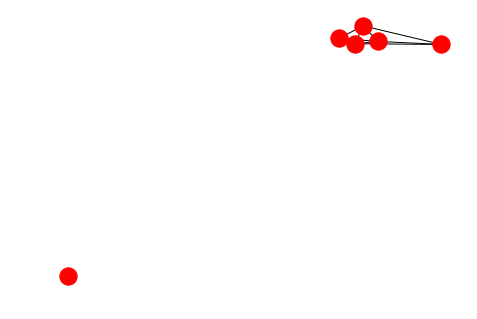

In [145]:
induced_pre_G = community.induced_graph(pre_cluster, pre_wG)
nx.draw(induced_pre_G)
print(nx.info(induced_pre_G))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 35
Average degree:   7.7778


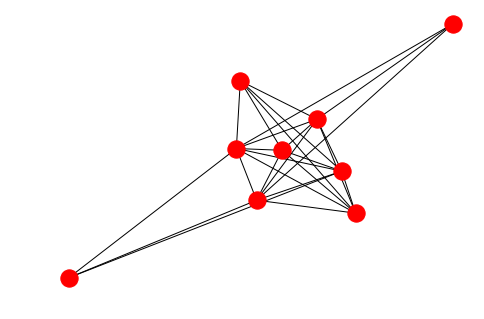

In [144]:
induced_post_G = community.induced_graph(post_cluster, post_wG)
nx.draw(induced_post_G)
print(nx.info(induced_post_G))

In [190]:
pre_cluster_tn = defaultdict(list)
for v, c in pre_cluster.items():
    pre_cluster_tn[c].append(v)

post_cluster_tn = defaultdict(list)
for v, c in post_cluster.items():
    post_cluster_tn[c].append(v)

for c1, v1 in pre_cluster_tn.items():
    for c2, v2 in post_cluster_tn.items():
        print("pre-network cluster # {} & post-network cluster # {}".format(c1, c2))
        common = list(set(v1).intersection(v2))
        print("Number of common OTUs:{}\n".format(len(common)))

pre-network cluster # 0 & post-network cluster # 0
Number of common OTUs:15

pre-network cluster # 0 & post-network cluster # 1
Number of common OTUs:22

pre-network cluster # 0 & post-network cluster # 2
Number of common OTUs:4

pre-network cluster # 0 & post-network cluster # 3
Number of common OTUs:12

pre-network cluster # 0 & post-network cluster # 4
Number of common OTUs:8

pre-network cluster # 0 & post-network cluster # 5
Number of common OTUs:17

pre-network cluster # 0 & post-network cluster # 6
Number of common OTUs:11

pre-network cluster # 0 & post-network cluster # 7
Number of common OTUs:4

pre-network cluster # 0 & post-network cluster # 8
Number of common OTUs:5

pre-network cluster # 1 & post-network cluster # 0
Number of common OTUs:4

pre-network cluster # 1 & post-network cluster # 1
Number of common OTUs:13

pre-network cluster # 1 & post-network cluster # 2
Number of common OTUs:3

pre-network cluster # 1 & post-network cluster # 3
Number of common OTUs:4

pre-ne

In [183]:
for c, v in pre_cluster_tn.items():
    print(c, len(v), sep = ": ")
print("--------------------------------")
for c, v in post_cluster_tn.items():
    print(c, len(v), sep = ": ")

0: 113
1: 46
2: 49
3: 89
4: 58
5: 2
--------------------------------
0: 38
1: 57
2: 9
3: 35
4: 34
5: 36
6: 30
7: 8
8: 9


In [189]:
print(pre_wG[22])
#print(pre_wG[301])

{301: {'weight': 1}}
